In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as snc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb


In [2]:
df=pd.read_csv('Red.csv')
df.shape

(8666, 8)

In [3]:
df.sample(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
3602,Les Terrasses Rouge 2011,France,Côtes de Provence,Vallombrosa,4.3,29,28.49,2011
1028,Vitral Reserva Cabernet Sauvignon 2017,Chile,Maipo Valley,Viña Maipo,3.4,1354,7.50,2017
8355,La Luna e i Falò Barbera d'Asti Superiore 2016,Italy,Barbera d'Asti,Vite Colte,4.0,911,12.95,2016
246,Figure Libre Freestyle Rouge 2018,France,Pays d'Oc,Gayda,3.7,107,11.45,2018
372,Valley Oaks Cabernet Sauvignon 2016,United States,California,Fetzer,3.6,1102,11.19,2016


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [5]:
df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


In [6]:
df = df.dropna(subset=["Price"])


In [7]:
df.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

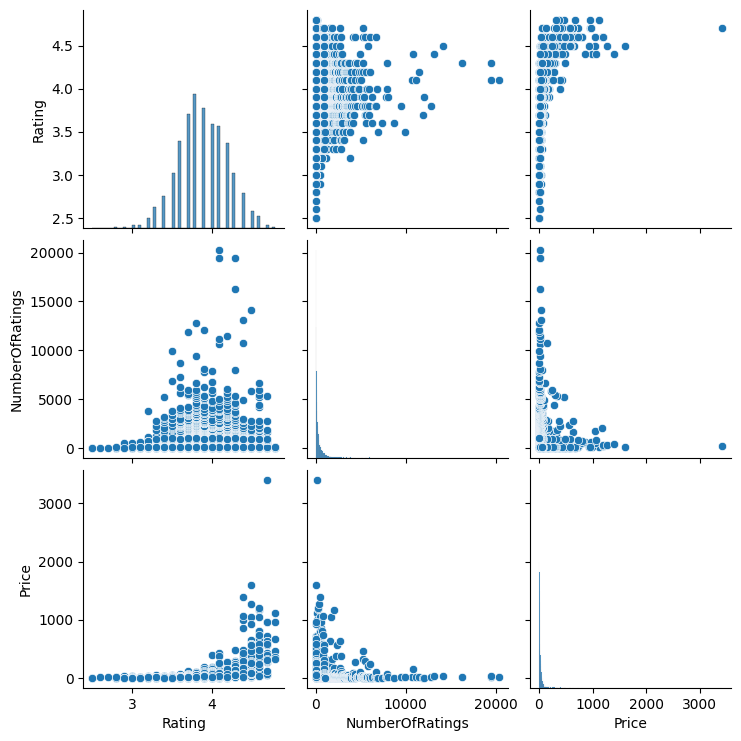

In [8]:
numerical_col=['Rating','NumberOfRatings','Price','Year']
snc.pairplot(df[numerical_col])
plt.show()

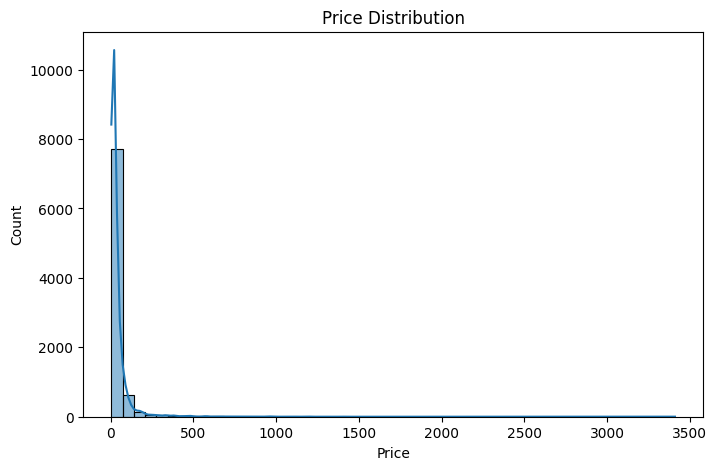

In [9]:
plt.figure(figsize=(8,5))
snc.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

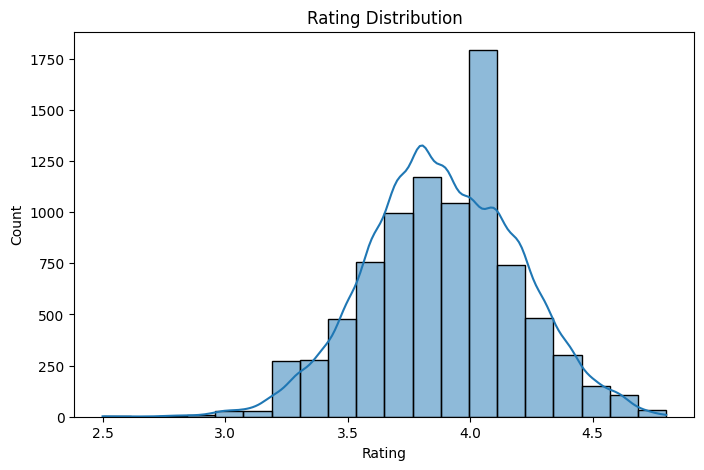

In [10]:
plt.figure(figsize=(8,5))
snc.histplot(df['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()

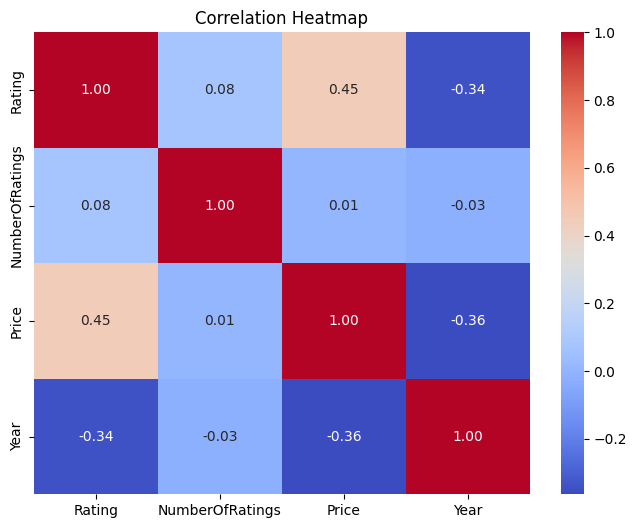

In [11]:
for col in numerical_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr = df[numerical_col].corr()

plt.figure(figsize=(8,6))
snc.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


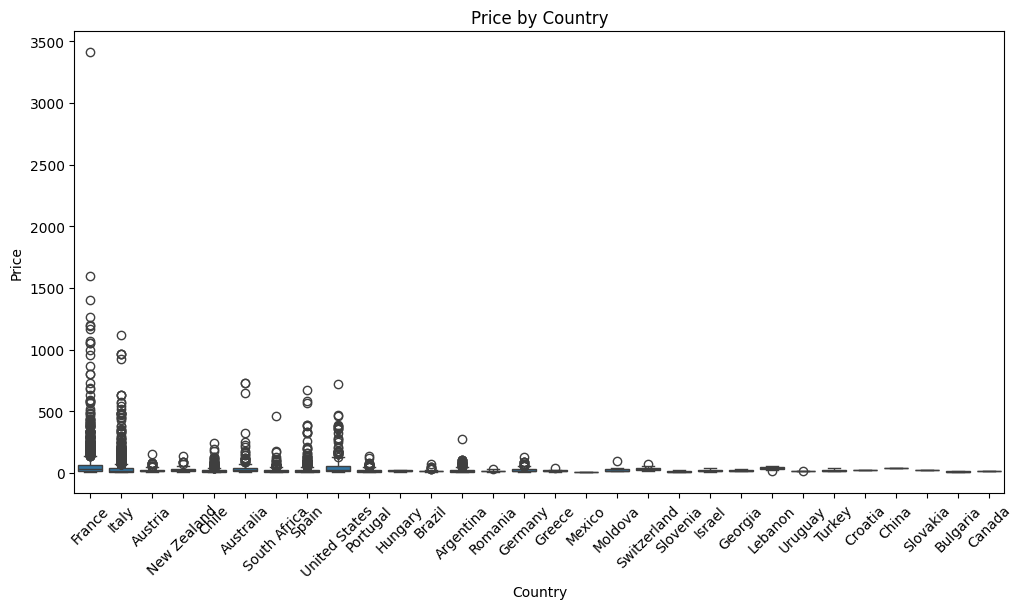

In [12]:
plt.figure(figsize=(12,6))
snc.boxplot(x='Country', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Country")
plt.show()


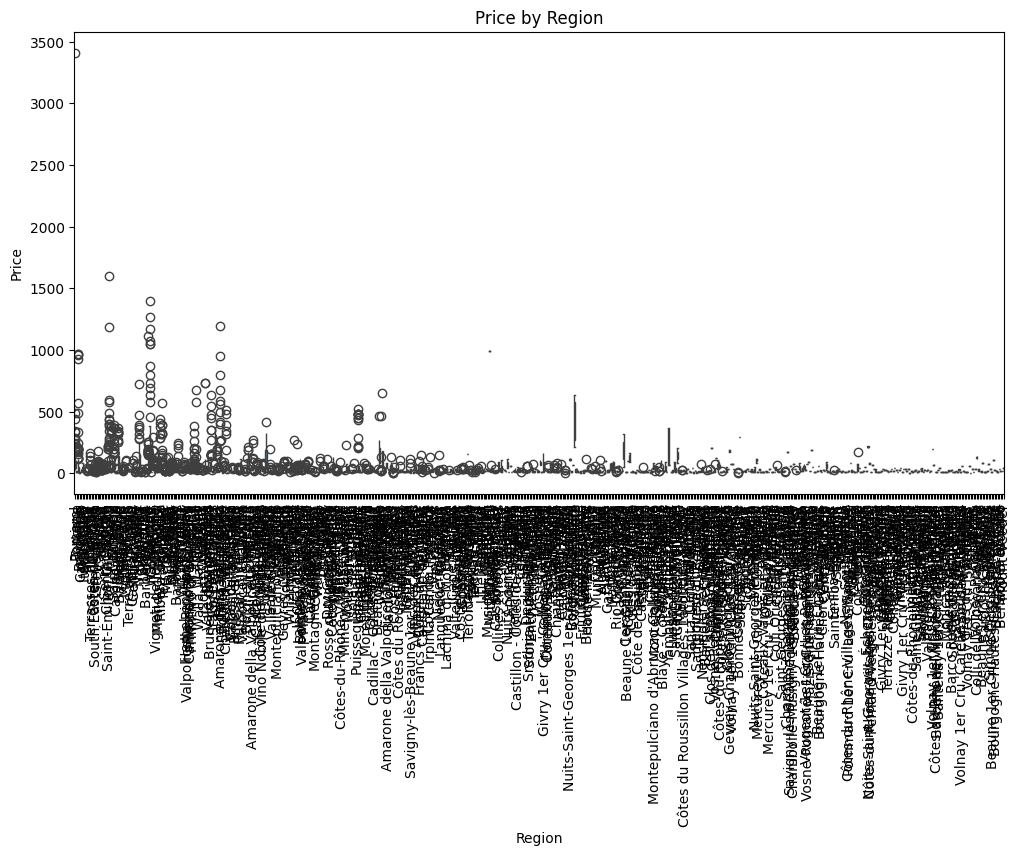

In [13]:
plt.figure(figsize=(12,6))
snc.boxplot(x='Region', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price by Region")
plt.show()


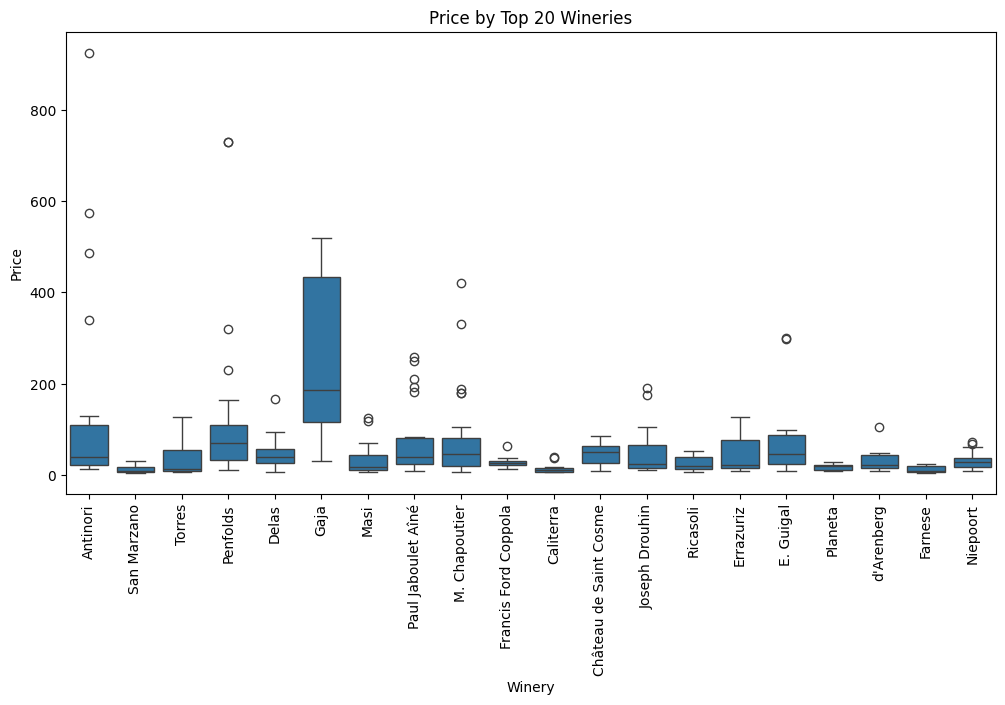

In [14]:
plt.figure(figsize=(12,6))
top_wineries = df['Winery'].value_counts().nlargest(20).index
snc.boxplot(x='Winery', y='Price', data=df[df['Winery'].isin(top_wineries)])
plt.xticks(rotation=90)#Rotates winery names vertically so they don’t overlap and are readable.
plt.title("Price by Top 20 Wineries")
plt.show()

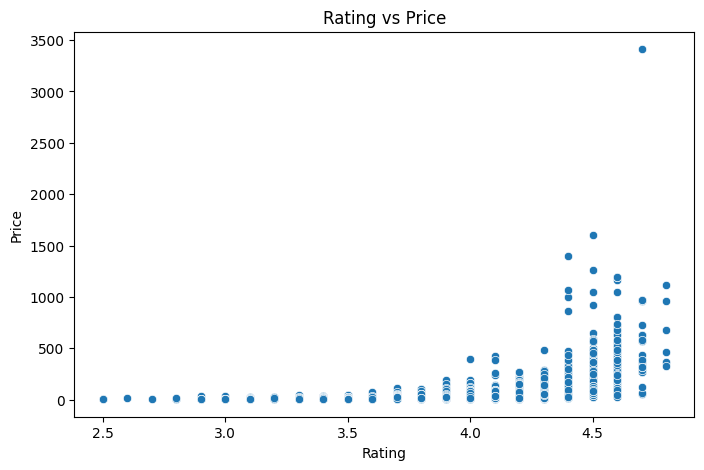

In [15]:
plt.figure(figsize=(8,5))
snc.scatterplot(x='Rating', y='Price', data=df)
plt.title("Rating vs Price")
plt.show()


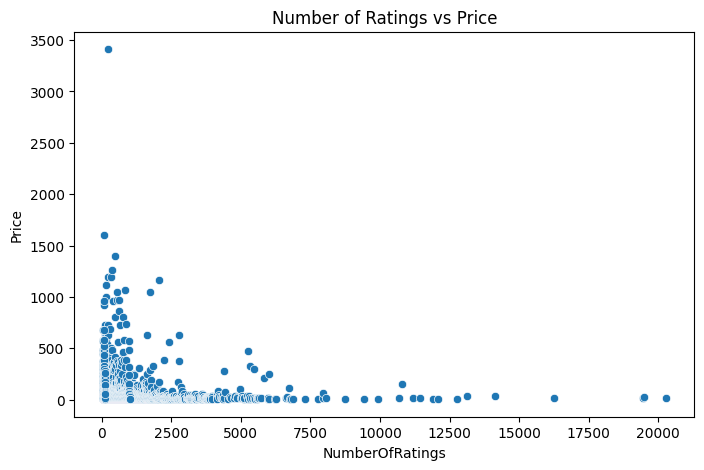

In [16]:
plt.figure(figsize=(8,5))
snc.scatterplot(x='NumberOfRatings', y='Price', data=df)
plt.title("Number of Ratings vs Price")
plt.show()


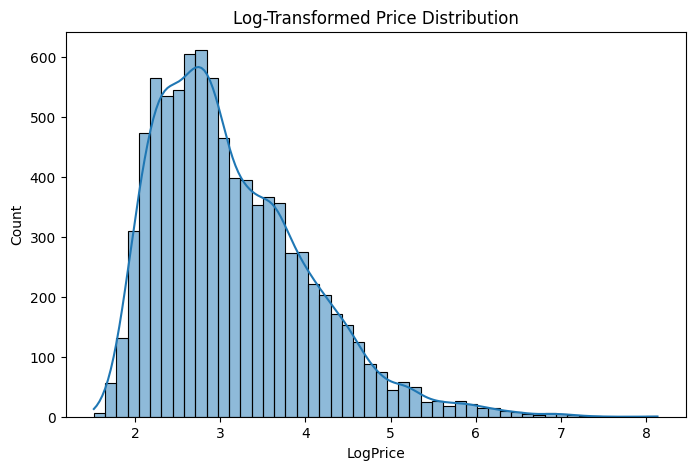

In [17]:
import numpy as np

df['LogPrice'] = np.log1p(df['Price'])

plt.figure(figsize=(8,5))
snc.histplot(df['LogPrice'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [18]:
encoder=OneHotEncoder()

categorical_cols=['Country','Region','Winery','Year']

df=pd.get_dummies(df,columns=categorical_cols,drop_first=True,dtype=int)
df

,Name,Rating,NumberOfRatings,Price,LogPrice,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,...,Year_2010.0,Year_2011.0,Year_2012.0,Year_2013.0,Year_2014.0,Year_2015.0,Year_2016.0,Year_2017.0,Year_2018.0,Year_2019.0
0,Pomerol 2011,4.2,100,95.00,4.564348,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Lirac 2017,4.3,100,15.50,2.803360,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Erta e China Rosso di Toscana 2015,3.9,100,7.45,2.134166,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Bardolino 2019,3.5,100,8.72,2.274186,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ried Scheibner Pinot Noir 2016,3.9,100,29.15,3.406185,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,3.8,994,16.47,2.860485,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8662,Botrosecco Maremma Toscana 2016,4.0,995,20.09,3.048799,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8663,Haut-Médoc 2010,3.7,996,23.95,3.216874,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8664,Shiraz 2019,3.5,998,6.21,1.975469,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
x=df.drop(['Price','Name'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "")


In [24]:
df = df.rename(columns={
    "name": "Name",
    "country": "Country",
    "region": "Region",
    "winery": "Winery",
    "rating": "Rating",
    "numberofratings": "NumberOfRatings",
    "price": "Price",
    "year": "Year"
})



Using RandomForestRegressor

In [25]:
available_cols = [col for col in ["Name", "Country", "Region", "Winery", "Rating", "NumberOfRatings", "Year"] if col in df.columns]
print("📊 Using columns:", available_cols)

X = df[available_cols]
y = df["Price"]

X = pd.get_dummies(X, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfmodel.fit(x_train, y_train)

y_pred = rfmodel.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Trained Successfully")
print("MSE:", mse)
print("R2 Score:", r2)

📊 Using columns: ['Name', 'Rating', 'NumberOfRatings']
Model Trained Successfully
MSE: 2129.5273485394546
R2 Score: 0.5026581856194793


In [26]:
import joblib

# Save model AND training column names
joblib.dump((rfmodel, X.columns), "wine_model.pkl")
print("✅ Model and feature columns saved as wine_model.pkl")


✅ Model and feature columns saved as wine_model.pkl
